In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as sh
from scipy.ndimage import gaussian_filter 
from skimage.exposure import adjust_gamma
from scipy.signal import correlate
from scipy.ndimage import distance_transform_edt, label
from skimage.segmentation import watershed
from skimage.feature import peak_local_max


In [3]:
image_original = cv2.imread('/content/drive/MyDrive/BTP/Fractographs/10persec/B6067/B6067_16.bmp', cv2.IMREAD_COLOR)[:960, :1280]
adj_image = adjust_gamma(image_original, 2)

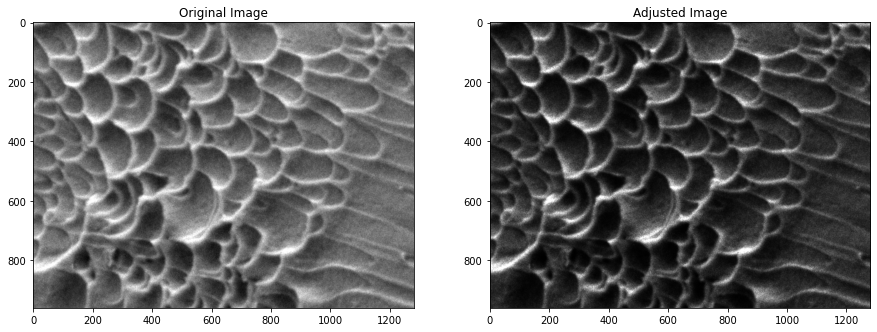

In [6]:
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Adjusted Image')
ax2.imshow(adj_image, cmap='gray')

In [7]:
hist = np.histogram(np.ravel(adj_image), bins=256)
hist

(array([  672,  4062,  7098,  9657, 14397, 21597, 21825, 27234, 20703,
        35097, 26442, 44022, 31338, 33672, 36162, 38508, 41343, 42909,
        46716, 48375, 50565, 26352, 55233, 57915, 30360, 63333, 32583,
        68334, 34833, 72528, 37140, 77577, 39780, 80391, 40641, 41184,
        83820, 42126, 43071, 41772, 85455, 42876, 42831, 42393, 83802,
        41496, 40611, 40785, 40335, 40326, 76833, 37788, 37044, 36462,
        35745, 34368, 33744, 33471, 32106, 31719, 31539, 30594, 29658,
        29505, 28314, 27882, 26679, 26256, 25638, 24810, 24867, 24615,
        23058, 23004, 22071, 21546, 21075, 20463,     0, 19956, 19791,
        19146, 19377, 18300, 17991, 17145,     0, 16890, 16950, 16290,
        15921, 15366,     0, 15234, 14814, 14367, 14193, 13683,     0,
        13908, 13116, 12885, 12525,     0, 12699, 11979, 11673,     0,
        11592, 10926, 10989,     0, 10185, 10443,  9618,     0,  9837,
         9306,  9264,     0,  8967,  8781,  8487,     0,  8253,  8136,
      

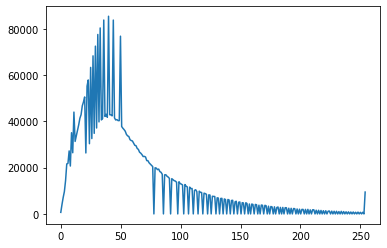

In [8]:
plt.plot(hist[1][:-1], hist[0])
plt.show()

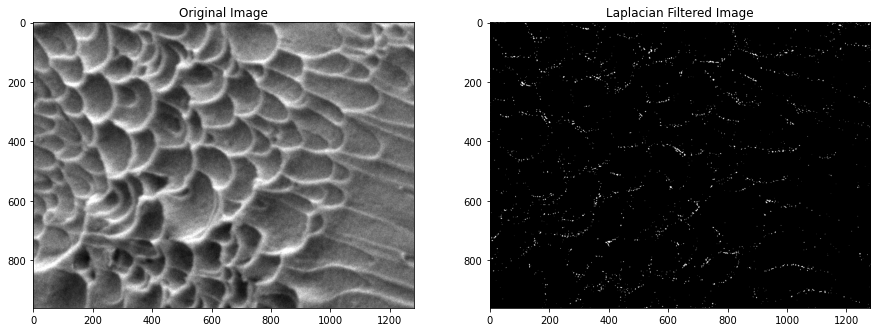

In [9]:
# remove noise
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
# Reduce noise in image
img = cv2.GaussianBlur(image_gray,(9,9),0)
#img = image_gray
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.Laplacian(img, ksize=5, ddepth=cv2.CV_16S)
# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)
# threshold to binary
thresh = cv2.threshold(filtered_image, 251, 255, cv2.THRESH_BINARY)[1]
filtered_image = thresh
# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

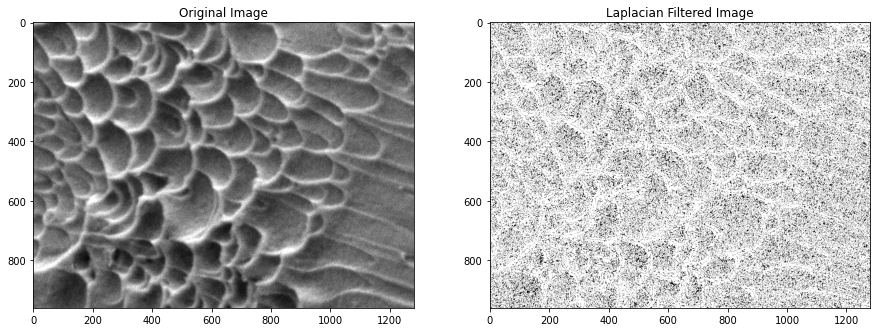

In [10]:
# remove noise
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
# Reduce noise in image
img = cv2.GaussianBlur(image_gray,(9,9),0)
#img = image_gray
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.Laplacian(img, ksize=7, ddepth=cv2.CV_16S)
# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)
# threshold to binary
thresh = cv2.threshold(filtered_image, 251, 255, cv2.THRESH_BINARY)[1]
filtered_image = thresh
# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

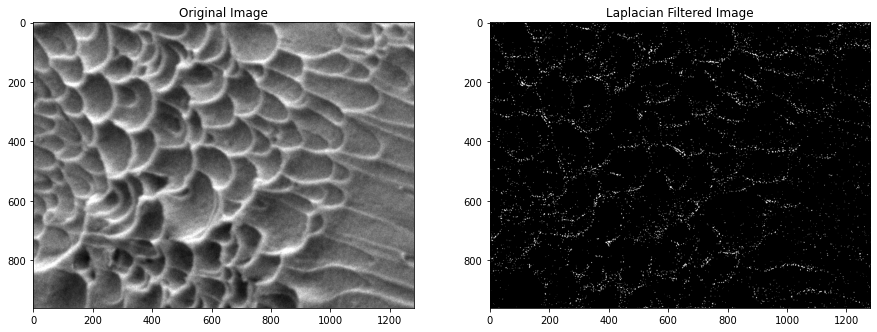

In [11]:
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
# Reduce noise in image
#img = cv2.GaussianBlur(image_gray,(9,9),0)
img = gaussian_filter(image_gray, sigma=1.5)
#img = image_gray
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.Laplacian(img, ksize=5, ddepth=cv2.CV_16S)
# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)
# threshold to binary
thresh = cv2.threshold(filtered_image, 251, 255, cv2.THRESH_BINARY)[1]
filtered_image = thresh
# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

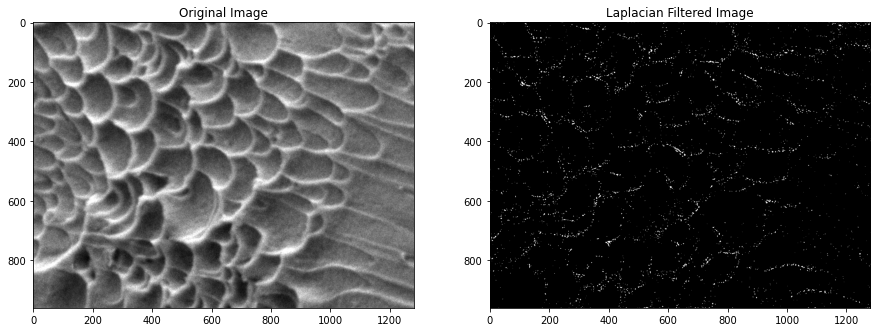

In [12]:
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
# Reduce noise in image
#img = cv2.GaussianBlur(image_gray,(9,9),0)
img = gaussian_filter(image_gray, sigma=1.6)
#img = image_gray
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.Laplacian(img, ksize=5, ddepth=cv2.CV_16S)
# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)
# threshold to binary
thresh = cv2.threshold(filtered_image, 251, 255, cv2.THRESH_BINARY)[1]
filtered_image = thresh
#final_image = cv2.medianBlur(thresh, 3)
# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

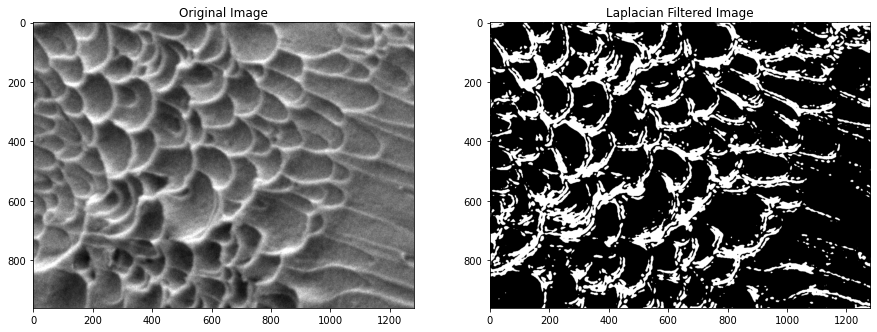

In [111]:
image_gray = cv2.cvtColor(adj_image, cv2.COLOR_BGR2GRAY)
# Reduce noise in image
#img = cv2.GaussianBlur(image_gray,(9,9),0)
img = gaussian_filter(image_gray, sigma=4)
#custom_filter = np.asarray([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]], dtype=np.int32)
#img = np.asarray(correlate(image_gray, custom_filter, mode='same'))
#img = (img-img.min())/(img.max()-img.min())*255
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.Laplacian(img, ksize=5, ddepth=cv2.CV_16S)
# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)
# threshold to binary
thresh = cv2.threshold(filtered_image,35, 255, cv2.THRESH_BINARY)[1]
filtered_image = thresh
final_image = cv2.medianBlur(thresh, 7)
# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(final_image, cmap='gray')

In [118]:
distance = distance_transform_edt(image_gray)

In [119]:
#coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=adj_image)
markers, _ = label(final_image)
labels = watershed(-distance, markers, mask=image_gray)

Text(0.5, 1.0, 'Separated objects')

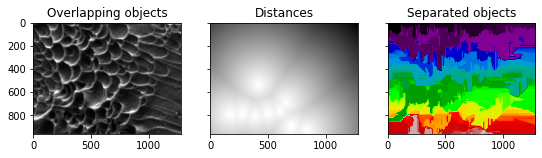

In [120]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_gray, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')


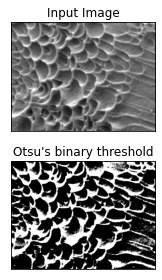

In [8]:
# SEGMENTATION
image_original = cv2.imread('/content/drive/MyDrive/BTP/Fractographs/10persec/B6067/B6067_16.bmp', cv2.IMREAD_COLOR)[:960, :1280]

# gray = image_original
# b,g,r = cv2.split(img)
# rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211)
plt.imshow(image_original)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

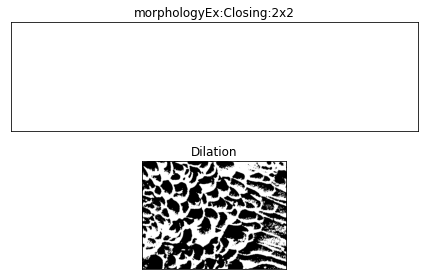

In [11]:
# SEGMENTATION
image_original = cv2.imread('/content/drive/MyDrive/BTP/Fractographs/10persec/B6067/B6067_16.bmp', cv2.IMREAD_COLOR)[:960, :1280]
# image_gray = cv2.cvtColor(image_original, cv2.COLOR_GRAY2BGR)
img = image_original
# print(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplot(211)#plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_bg, 'gray')
plt.imsave(r'dilation.png',sure_bg)
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

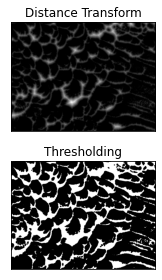

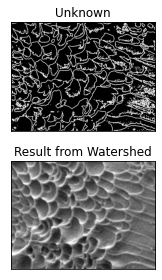

In [12]:
plt.subplot(211),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

plt.subplot(211),plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


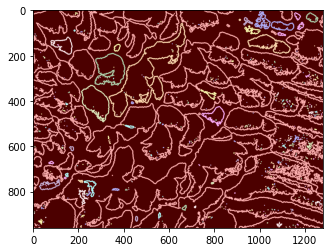

   label  area  equivalent_diameter  mean_intensity  solidity  \
0      1  2375            54.990398           255.0  0.585986   
1      2    85            10.403142           255.0  0.726496   
2      3   425            23.262132           255.0  0.591922   
3      4   783            31.574461           255.0  0.446918   
4      5   641            28.568279           255.0  0.589154   

   area_in_microns  equivalent_diameter_microns  
0        17.565500                     4.729174  
1         0.628660                     0.894670  
2         3.143300                     2.000543  
3         5.791068                     2.715404  
4         4.740836                     2.456872  


In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import measure, io, img_as_ubyte
from skimage.color import label2rgb, rgb2gray


img = unknown

scale = 0.086 #1 pixel in microns

# from skimage.filters import threshold_otsu
# threshold = threshold_otsu(img)

# thresholded_img = img < threshold
# #plt.imshow(thresholded_img, cmap='gray')
# #plt.show()
from skimage.segmentation import clear_border
edge_touching_removed = clear_border(img)

label_image = measure.label(edge_touching_removed, connectivity=img.ndim)
#plt.imshow(label_image)
#plt.show()

image_label_overlay = label2rglabel_imageb(label_image, image=img)
plt.imshow(image_label_overlay)
plt.show()

props = measure.regionprops_table(, img, properties=['label', 'area', 'equivalent_diameter', 'mean_intensity', 'solidity'])

import pandas as pd
df = pd.DataFrame(props)


df = df[df['area'] > 20]

df['area_in_microns'] = df['area'] * (scale**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)
print(df.head())